In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2022-01-20"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2022_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-01-20,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5950,동래구,6680,동래구,730,12.27%,"6,315"
1,2022-01-20,간장,오복왕표 0.9ℓ 1병,6980,동래구,7500,동래구,520,7.45%,"7,240"
2,2022-01-20,갈치,60cm정도 500g 1마리(냉동),9800,동래구,17800,동래구,8000,81.63%,"13,800"
3,2022-01-20,고등어,30㎝정도 500g 1마리,4000,동래구,4933,동래구,933,23.33%,"4,467"
4,2022-01-20,달걀,오경슈퍼란60g정도 10개,3980,동래구,4280,동래구,300,7.54%,"4,130"
5,2022-01-20,닭고기,육계 1.0㎏,5483,동래구,8980,동래구,3497,63.78%,"7,232"
6,2022-01-20,대파,1.0㎏,3254,동래구,3600,동래구,346,10.63%,"3,427"
7,2022-01-20,돼지고기,삼겹살 500g,12500,동래구,12900,동래구,400,3.2%,"12,700"
8,2022-01-20,두부,500g 판두부(국산포장두부 420g) 1모,5194,동래구,5200,동래구,6,0.12%,"5,197"
9,2022-01-20,라면,신라면 120g 1봉지,736,동래구,736,동래구,0,0.0%,736


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2022-04-21"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2022_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-04-21,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7450,동래구,8625,동래구,1175,15.77%,"8,038"
1,2022-04-21,간장,오복왕표 0.9ℓ 1병,6980,동래구,7500,동래구,520,7.45%,"7,240"
2,2022-04-21,갈치,60cm정도 500g 1마리(냉동),11000,동래구,19142,동래구,8142,74.02%,"15,071"
3,2022-04-21,달걀,오경슈퍼란60g정도 10개,3980,동래구,4280,동래구,300,7.54%,"4,130"
4,2022-04-21,닭고기,육계 1.0㎏,6650,동래구,9980,동래구,3330,50.08%,"8,315"
5,2022-04-21,대파,1.0㎏,2630,동래구,2943,동래구,313,11.9%,"2,787"
6,2022-04-21,돼지고기,삼겹살 500g,10900,동래구,12600,동래구,1700,15.6%,"11,750"
7,2022-04-21,두부,500g 판두부(국산포장두부 420g) 1모,5194,동래구,5200,동래구,6,0.12%,"5,197"
8,2022-04-21,라면,신라면 120g 1봉지,736,동래구,736,동래구,0,0.0%,736
9,2022-04-21,맥주,하이트 500㎖ 1병,1550,동래구,1580,동래구,30,1.94%,"1,565"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2022-07-21"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2022_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-07-21,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,동래구,8870,동래구,1445,19.46%,"8,148"
1,2022-07-21,간장,오복왕표 0.9ℓ 1병,6350,동래구,7500,동래구,1150,18.11%,"6,925"
2,2022-07-21,갈치,60cm정도 500g 1마리(냉동),11900,동래구,15840,동래구,3940,33.11%,"13,870"
3,2022-07-21,고등어,30㎝정도 500g 1마리,4950,동래구,5000,동래구,50,1.01%,"4,975"
4,2022-07-21,달걀,오경슈퍼란60g정도 10개,3980,동래구,4400,동래구,420,10.55%,"4,190"
5,2022-07-21,닭고기,육계 1.0㎏,6900,동래구,8980,동래구,2080,30.14%,"7,940"
6,2022-07-21,대파,1.0㎏,2958,동래구,3730,동래구,772,26.1%,"3,344"
7,2022-07-21,돼지고기,삼겹살 500g,9900,동래구,13600,동래구,3700,37.37%,"11,750"
8,2022-07-21,두부,500g 판두부(국산포장두부 420g) 1모,5194,동래구,5200,동래구,6,0.12%,"5,197"
9,2022-07-21,라면,신라면 120g 1봉지,736,동래구,736,동래구,0,0.0%,736


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2022-10-20"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2022_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-10-20,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,동래구,8940,동래구,1515,20.4%,"8,183"
1,2022-10-20,간장,오복왕표 0.9ℓ 1병,6350,동래구,7100,동래구,750,11.81%,"6,725"
2,2022-10-20,갈치,60cm정도 500g 1마리(냉동),12000,동래구,12375,동래구,375,3.12%,"12,188"
3,2022-10-20,고등어,30㎝정도 500g 1마리,3780,동래구,4350,동래구,570,15.08%,"4,065"
4,2022-10-20,달걀,오경슈퍼란60g정도 10개,4290,동래구,4400,동래구,110,2.56%,"4,345"
5,2022-10-20,닭고기,육계 1.0㎏,5816,동래구,10980,동래구,5164,88.79%,"8,398"
6,2022-10-20,대파,1.0㎏,3550,동래구,3668,동래구,118,3.32%,"3,609"
7,2022-10-20,돼지고기,삼겹살 500g,10750,동래구,13200,동래구,2450,22.79%,"11,975"
8,2022-10-20,두부,500g 판두부(국산포장두부 420g) 1모,4520,동래구,5194,동래구,674,14.91%,"4,857"
9,2022-10-20,라면,신라면 120g 1봉지,820,동래구,820,동래구,0,0.0%,820


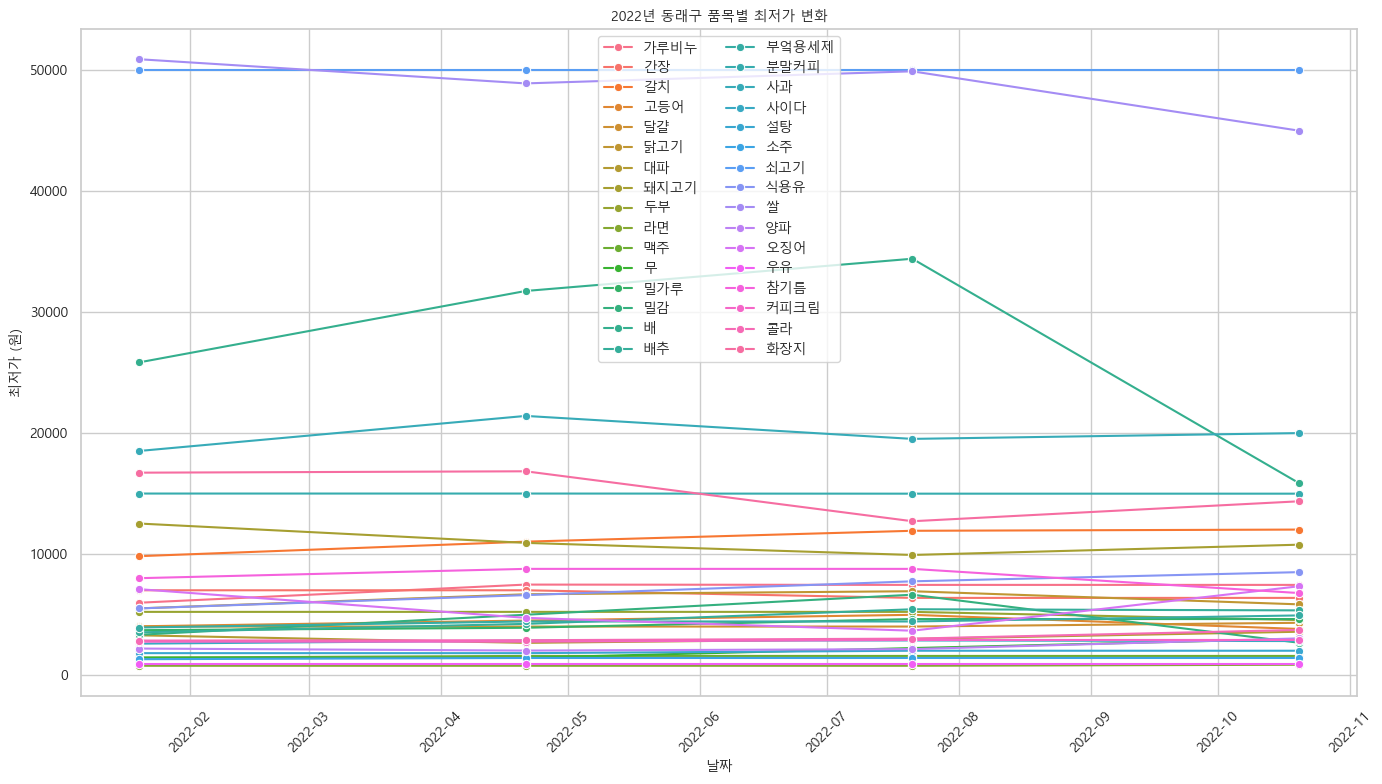

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("동래구2022_1q.csv")
q2 = pd.read_csv("동래구2022_2q.csv")
q3 = pd.read_csv("동래구2022_3q.csv")
q4 = pd.read_csv("동래구2022_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2022년 동래구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("동래구2022_min.csv", index=False, encoding="utf-8-sig")

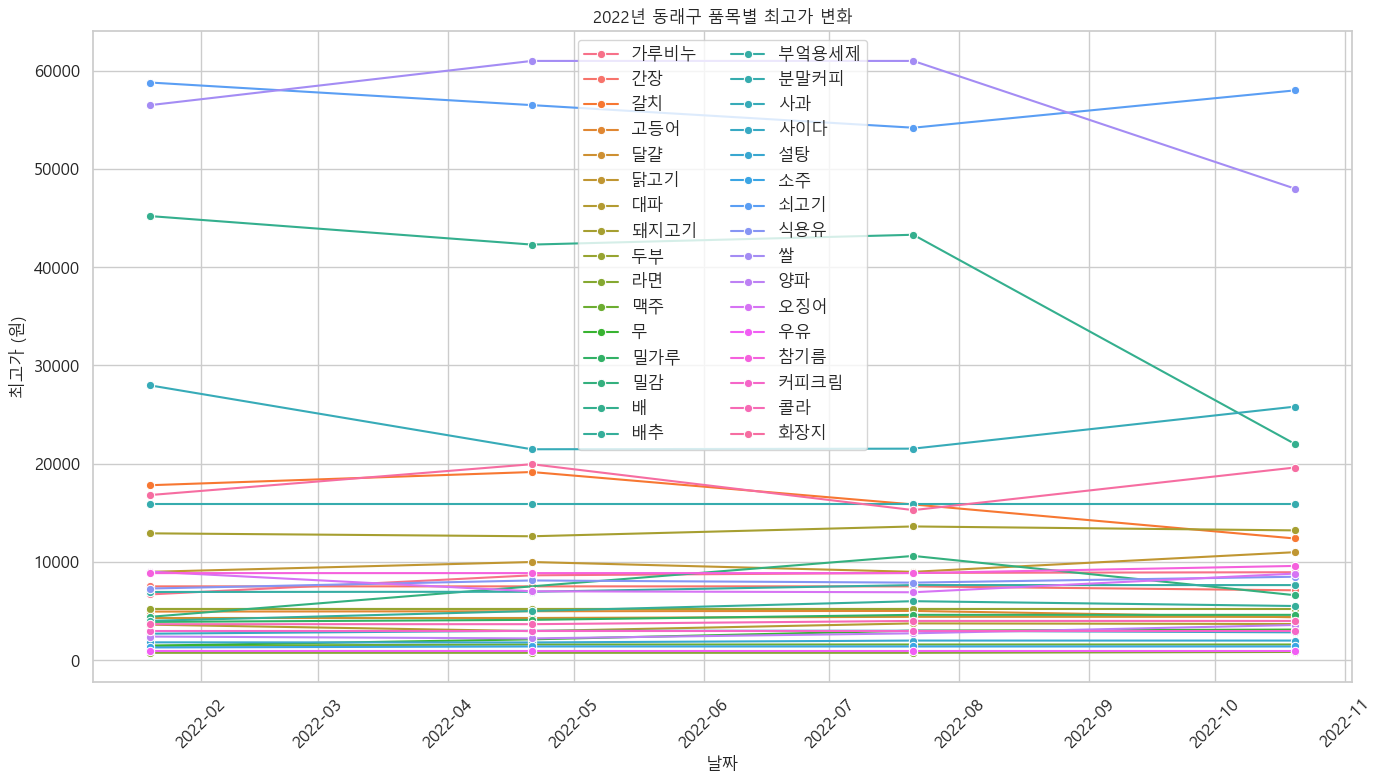

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("동래구2022_1q.csv")
q2 = pd.read_csv("동래구2022_2q.csv")
q3 = pd.read_csv("동래구2022_3q.csv")
q4 = pd.read_csv("동래구2022_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2022년 동래구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("동래구2022_max.csv", index=False, encoding="utf-8-sig")